# Random walk modelling

During this seminar we will immulate the random walk on knight's network, which you should build in the first place.

Consider $n \times n$ chessboard with a single knight on it. 
<br\>
1. Construct a network with all knight's possible moves. In this network each node represents chessboard locations and an edge between two locations appears if knight is admitted to move from one to another.
2. Implement simulation of knight random walk on chessboard

    * Calculate average probability to visit chessboard locations
    * Calculate average recurrence time of a node

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand 
import networkx as nx
%matplotlib inline

### Knight's Network

In [2]:
def GenKnightNetwork(boardSize):
    G = nx.Graph()
    pos = {}
    for row in xrange(boardSize):
        for col in xrange(boardSize):
            nodeId = row + col*boardSize
            pos[nodeId] = np.array([1.0*row/boardSize, 1.0*col/boardSize])
            newPos = GetLegalMoves(row, col, boardSize)
            for e in newPos:
                nid = e[0] + e[1]*boardSize
                G.add_edge(nodeId, nid)
    return G, pos

def GetLegalMoves(x,y,boardSize):
    newMoves = []
    moveOffsets = [(-1,-2),(-1,2),(-2,-1),(-2,1),
                   ( 1,-2),( 1,2),( 2,-1),( 2,1)]
    for i in moveOffsets:
        newX = x + i[0]
        newY = y + i[1]
        if isLegalCoord(newX,boardSize) and \
                        isLegalCoord(newY,boardSize):
            newMoves.append((newX,newY))
    return newMoves

def isLegalCoord(x,boardSize):
    if x >= 0 and x < boardSize:
        return True
    else:
        return False

In [3]:
boardSize = 8
(G,pos) = GenKnightNetwork(boardSize)

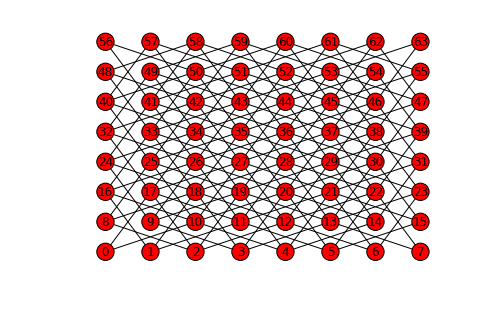

In [4]:
nx.draw(G, pos)

### Random Walk Process

In [5]:
def RandomWalk(G, xi, n, till_first_return = False):
    nodeSeq = []
    nodeSeq.append(xi)
    if till_first_return:
        xInit = xi
        while True:
            neig = np.array(G.neighbors(xi))
            xi = choice(G.neighbors(xi),1)[0]       
            nodeSeq.append(xi)
            if xi == xInit:
                return nodeSeq
    else:
        for i in xrange(n):
            neig = np.array(G.neighbors(xi))
            xi = choice(G.neighbors(xi),1)[0]       
            nodeSeq.append(xi)
        return nodeSeq


In [8]:
nodeSeq = RandomWalk(G, 0, 100)
edgeSeq = [(nodeSeq[i-1], nodeSeq[i]) for i in xrange(1,len(nodeSeq))]

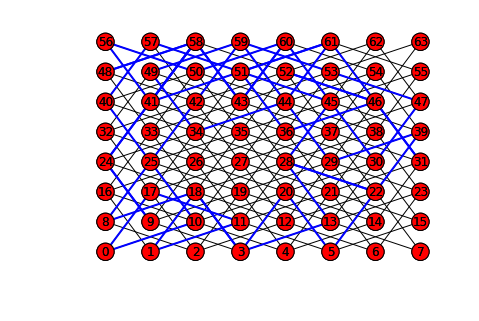

In [13]:
nodeSeq = RandomWalk(G, 0, 100, True)
edgeSeq = [(nodeSeq[i-1], nodeSeq[i]) for i in xrange(1,len(nodeSeq))]
nx.draw(G, pos)
nx.draw(G, pos, edgelist = edgeSeq, edge_color='blue', width=2)

In [20]:
nodeSeq = []
for xi in xrange(G.number_of_nodes()):
    nodeSeq.append(RandomWalk(G, xi, 1000))

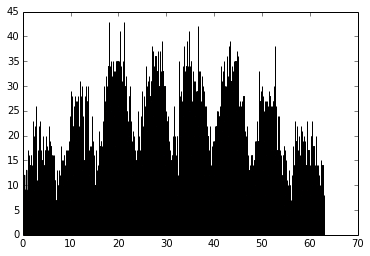

In [22]:
h = plt.hist(nodeSeq, bins = G.number_of_nodes())

<Container object of 64 artists>

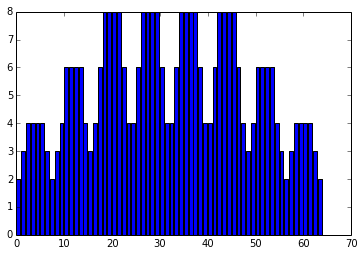

In [27]:
plt.bar(range(0,64), G.degree().values())

In [35]:
returnTime = []
for i in xrange(1000):
    returnTime.append(len(RandomWalk(G, 27, 0, True)))

{'boxes': [<matplotlib.lines.Line2D at 0x7f58fe270650>],
 'caps': [<matplotlib.lines.Line2D at 0x7f58fe265990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f58fe279310>,
 'medians': [<matplotlib.lines.Line2D at 0x7f58fe270c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f58fe265050>,
  <matplotlib.lines.Line2D at 0x7f58fe2652d0>]}

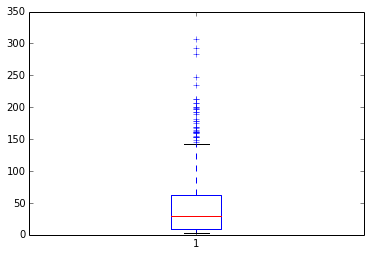

In [36]:
plt.boxplot(returnTime)